In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import string
from string import digits
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Loading the google drive containing all data # 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the excel sheet into a dataframe after imputing all the patient details # 
df3 = pd.read_excel('/content/drive/MyDrive/Project Data/X-ray1.xlsx')
df3.drop(df3.columns[df3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
# Display of the dataframe with all the info of the patients so far # 
df3.head(2)

,Patient_ID,Image_file1,Image_file2,Report_ID,Comparison,Indication,Findings,Impression
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,1.xml,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,2.xml,None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.


In [ ]:
# Checking the number of 'Impression' counts. For eg. we see 301 patients had ' No acute cardiopulmonary abnormality' mentioned in the Impression section of their report#
df3['Impression'].value_counts()

No acute cardiopulmonary abnormality.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                301
No active disease.                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
#  Dropping the 'Comparison' , 'Indication' and 'Findings' columns from the dataframe since we wont be working on them # 
df3.drop(['Comparison', 'Indication','Findings'], axis=1, inplace=True)

In [ ]:
# Converting all the text in the 'Impression' column to lowercase # 
df3['Impression']= df3['Impression'].str.lower()

In [ ]:
# Checking how many times meaningless text like 'x-xxxx' has appeared in the 'Impression' Column
df3['Impression'].str.contains('x-xxxx').sum()

67

In [ ]:
# Removing 'x-xxxx' from the text
df3['Impression'] = df3['Impression'].str.replace('x-xxxx', '')

In [ ]:
# Checking if 'x-xxxx' still exists after replacement
df3['Impression'].str.contains('x-xxxx').sum()

0

In [ ]:
# Checking how many times meaningless text like 'xxxx' has appeared in the 'Impression' Column#
df3['Impression'].str.contains('xxxx').sum()

595

In [ ]:
# Removing 'xxxx' from the text#
df3['Impression'] = df3['Impression'].str.replace('xxxx', '')

In [ ]:
# Checking if 'xxxx' still exists after replacement
df3['Impression'].str.contains('xxxx').sum()

0

In [ ]:
# Removing all the unnecessary punctuations from the 'Impression' column #
punctuations = list(string.punctuation)
for i in punctuations:
        df3['Impression'] = df3['Impression'].str.replace(i, '')
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Checking the number of times the numeral '1' has appeared in the 'Impression' Column. Just like this other digits have appeared too and will be removed # 
df3['Impression'].str.contains('1').sum()

800

In [ ]:
# Replacing all the digits from the column 'Impression' 
for j in range(0,len(df3)):
    imp = df3['Impression'][j]    
    rem_nos = str.maketrans('', '', digits)
    df3['Impression'][j]  = imp.translate(rem_nos)

In [ ]:
# Checking whether a digit still exists after cleaning # 
df3['Impression'].str.contains('1').sum()

0

In [ ]:
# Removing any Extra spaces if there #
for j in range(0,len(df3)):
    exsp = df3['Impression'][j]
    exsp = ' '.join(exsp.split())
    df3['Impression'][j] = exsp

In [ ]:
#  Adding start and end tokens to all the 'Impression' and putting this info into a new column called 'Impression_token'
df3['Impression_token'] = 'begin' +' ' + df3.Impression + ' ' + 'end'

In [ ]:
# After cleaning the text of unneeded portions we see that the actual counts of 'Impressions' has changed 
df3['Impression'].value_counts()

no acute cardiopulmonary abnormality                                                                                                                                                                                                                                                                                                                                                                                                                                                                     411
no acute cardiopulmonary findings                                                                                                                                                                                                                                                                                                                                                                                                                                                                        181
no acute cardi

In [ ]:
#  displaying a sample height and width of an image # 


img = Image.open(r'/content/drive/MyDrive/Project Data/NLMCXR_png/CXR1_1_IM-0001-3001.png')
  
print("The height of the image is: ", img.height)
print("The width of the image is: ", img.width)

The height of the image is:  624
The width of the image is:  512


In [ ]:
# Storing the dataframe after text cleaning to a new excel sheet # 
df3.to_excel('/content/drive/MyDrive/Project Data/X-ray2.xlsx')

In [ ]:
wc_df= pd.read_excel('/content/drive/MyDrive/Project Data/X-ray2.xlsx')
wc_df.drop(wc_df.columns[wc_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
wc_df

,Patient_ID,Image_file1,Image_file2,Report_ID,Impression,Impression_token
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,1.xml,normal chest,begin normal chest end
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,2.xml,no acute pulmonary findings,begin no acute pulmonary findings end
2,CXR3,CXR3_IM-1384-1001.png,CXR3_IM-1384-2001.png,3.xml,no displaced rib fractures pneumothorax or ple...,begin no displaced rib fractures pneumothorax ...
3,CXR4,CXR4_IM-2050-2001.png,CXR4_IM-2050-1001.png,4.xml,bullous emphysema and interstitial fibrosis pr...,begin bullous emphysema and interstitial fibro...
4,CXR5,CXR5_IM-2117-1004003.png,CXR5_IM-2117-1003002.png,5.xml,no acute cardiopulmonary abnormality,begin no acute cardiopulmonary abnormality end
...,...,...,...,...,...,...
3815,CXR3995,CXR3995_IM-2046-2001.png,CXR3995_IM-2046-1001.png,3995.xml,interval resolution of bibasilar airspace dise...,begin interval resolution of bibasilar airspac...
3816,CXR3996,CXR3996_IM-2047-3001.png,CXR3996_IM-2047-1001.png,3996.xml,clear lungs no acute cardiopulmonary abnormality,begin clear lungs no acute cardiopulmonary abn...
3817,CXR3997,CXR3997_IM-2048-1001.png,CXR3997_IM-2048-1002.png,3997.xml,no acute findings no evidence for active tb,begin no acute findings no evidence for active...
3818,CXR3998,CXR3998_IM-2048-1002.png,CXR3998_IM-2048-1001.png,3998.xml,heart size is normal and the lungs are clear,begin heart size is normal and the lungs are c...


In [ ]:
# Appending all the Impression in a variable # 
all_imp =''
for i in range(len(wc_df)):
  all_imp = all_imp+(wc_df['Impression'][i]) + ' '

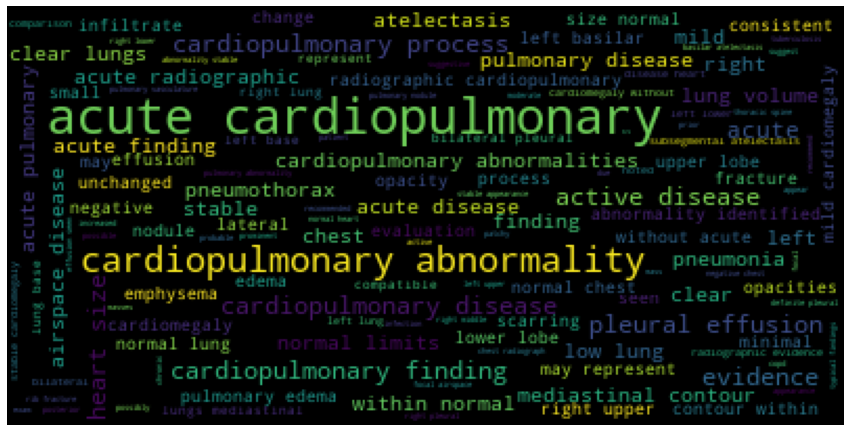

In [ ]:
# Displaying the wordcloud...as we see words like 'cardiopulmonary', 'abnormality' and 'acute' have appeared most times#
wordcloud = WordCloud(background_color="black").generate(all_imp)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()